In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [53]:
DATA = np.loadtxt(r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\BG_Pressure\signals.txt')
def DC_to_az(DC,m_to_z,omega,zeta2):
    elementary_charge = 1.6*1e-19
    amu = 1.66*1e-27
    return -16*elementary_charge*DC/(omega**2*zeta2*m_to_z*amu)
def RF_to_qz(RF,m_to_z,omega,zeta2):
    elementary_charge = 1.6*1e-19
    amu = 1.66*1e-27
    return 8*elementary_charge*RF/(omega**2*zeta2*m_to_z*amu)
def az_to_DC(a,m_to_z,omega,zeta2):
    elementary_charge = 1.6*1e-19
    amu = 1.66*1e-27
    return a/(-16*elementary_charge/(omega**2*zeta2*m_to_z*amu))
def qz_to_RF(q,m_to_z,omega,zeta2):
    elementary_charge = 1.6*1e-19
    amu = 1.66*1e-27
    return q/(8*elementary_charge/(omega**2*zeta2*m_to_z*amu))

[ 0.09598915 -0.05759349]
0.7237581534405573


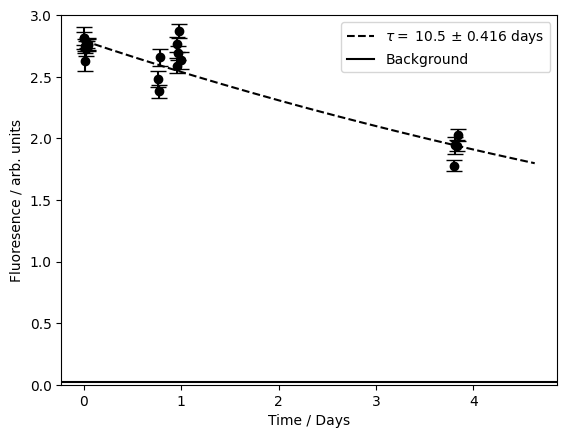

In [55]:
fig,ax = plt.subplots()

plt.errorbar(DATA[:,0]/60/60/24,DATA[:,1],DATA[:,2], color = 'k', ls = '', marker = 'o',capsize=6)

def ExpDecay(x,A,tau):
    return A*np.exp(-x/tau)

popt,pcov = curve_fit(ExpDecay,DATA[:,0],DATA[:,1],p0 = [3,10000],sigma = DATA[:,2],absolute_sigma= True)
plt.plot(np.linspace(0,400000,1000)/60/60/24,ExpDecay(np.linspace(0,400000,1000),popt[0],popt[1]), 'k--', label = rf'$\tau =$ {popt[1]/60/60/24:.3} $\pm$ {np.sqrt(pcov[1,1])/60/60/24:.3} days')
ax.set_xlabel('Time / Days')
ax.set_ylabel('Fluoresence / arb. units')
ax.set_ylim(0,3)
ax.axhline(0.02,0,4, color = 'k', label = 'Background')
ax.legend()


DCVoltages = np.array([-25,15])
RFVoltage = 377
print(DC_to_az(DCVoltages,479,2*np.pi*300*1e3,2.36*1e-4))
print(RF_to_qz(377,479,2*np.pi*300*1e3,2.36*1e-4))